## INFO 1998 Final Project

### Abdul Cherchar, Mohamed Cherchar, Tyler Dale, Stella Dong

### __Introduction__
This project uses data on Ukraine’s airspace to analyze and hopefully predict patterns of Russia’s military presence in an attempt to aid civilians and the Ukrainian government in preparation for Russian airstrikes. 

We will use the knowledge gained from INFO 1998 to: process and visualize datasets, find trends, and apply machine learning models to gain insight on the patterns in Ukraine’s airspace. Using known knowledge on the altitudes and velocities of these planes, we can make assumptions about what kind of plane is flying, if they pose any danger to the civilians, and what time they fly. 

Source: 
https://www.kaggle.com/datasets/rtwillett/ukrainian-airspace


In [2]:
#Import Necessary Projects
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### __Dataset & Data Processing__
This dataset has 17 features and has 3449233 entries. (The dataset did not include the column names so we inputted them from Kaggle). Because we specifically chose a dataset with a usability of 10 from Kaggle, we did not encounter any unusable data, like NaN entries.

We removed ‘ICAO 24-bit code’, ‘callsign’, ‘last contact time’, ‘longitude’, ‘latitude’, ‘heading’, ‘vertical rate’, ‘sensors’, ‘geo altitude’, ‘squawk’, ‘spi’, and ‘position source’ to make the data frame easier to read and to only include data relevant to our analysis. We are filtering the data frame to only include entries where ‘origin country’ is from ‘Russian Federation’ because it is the focus of our project and because of the size of our dataset, it’s not feasible to loop through each entry so we filtered the dataset instead of removing the other values from the dataset. For our visualization and machine learning models, we also found it to be beneficial if we added the column ‘hours_int’ that sliced the string from ‘time’ and converted it to an int, so the value could more easily be compared and used.


In [3]:
#import data set and remove unnecessary columns

df = pd.read_csv('ukraineflights.csv')
df.columns = ['ICAO 24-bit code', 'callsign', 'origin country', 'time', 'last contact time', 'longitude', 'latitude', 'barometic altitude', 'Aircraft is on the ground', 'velocity', 'heading', 'verticalrate', 'sensors', 'geoaltitude', 'squawk', 'spi', 'position source']
df.drop('ICAO 24-bit code', inplace = True, axis = 1)
df.drop('callsign', inplace = True, axis = 1)
df.drop('last contact time', inplace = True, axis = 1)
df.drop('longitude', inplace = True, axis = 1)
df.drop('latitude', inplace = True, axis = 1)
df.drop('heading', inplace = True, axis = 1)
df.drop('verticalrate', inplace = True, axis = 1)
df.drop('sensors', inplace = True, axis = 1)
df.drop('geoaltitude', inplace = True, axis = 1)
df.drop('squawk', inplace = True, axis = 1)
df.drop('spi', inplace = True, axis = 1)
df.drop('position source', inplace = True, axis = 1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9086717 entries, 0 to 9086716
Data columns (total 5 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   origin country             object 
 1   time                       object 
 2   barometic altitude         float64
 3   Aircraft is on the ground  bool   
 4   velocity                   float64
dtypes: bool(1), float64(2), object(2)
memory usage: 286.0+ MB


,origin country,time,barometic altitude,Aircraft is on the ground,velocity
0,United Kingdom,2022-02-22 15:28:36,891.54,False,85.05
1,Hungary,2022-02-22 15:28:28,10668.00,False,231.00
2,Hungary,2022-02-22 15:28:34,8557.26,False,221.14
3,United Kingdom,2022-02-22 15:28:35,11277.60,False,264.11
4,Hungary,2022-02-22 15:28:35,11285.22,False,232.25


In [4]:
#filtering 'Russian Federation'
filter = df['origin country'].isin(['Russian Federation'])

#slicing 'time' and converting string to int
df['hour_str'] = df['time'].str[11:13]
df['hour_int'] = df['hour_str'].astype(int)
df[filter].head()

,origin country,time,barometic altitude,Aircraft is on the ground,velocity,hour_str,hour_int
88,Russian Federation,2022-02-22 15:27:48,1234.44,False,132.36,15,15
133,Russian Federation,2022-02-22 15:28:35,708.66,False,62.27,15,15
165,Russian Federation,2022-02-22 15:28:36,10058.40,False,257.23,15,15
169,Russian Federation,2022-02-22 15:24:09,10972.80,False,223.27,15,15
293,Russian Federation,2022-02-22 15:29:41,1074.42,False,115.40,15,15


### __Data Visualization__


/var/folders/ry/l6smby5j2k72d6m4s9n7bc5w0000gn/T/ipykernel_27750/1700553196.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_day = df[filter][df['hour_int']>=6]
/var/folders/ry/l6smby5j2k72d6m4s9n7bc5w0000gn/T/ipykernel_27750/1700553196.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  day = temp_day[df['hour_int']<20]
/var/folders/ry/l6smby5j2k72d6m4s9n7bc5w0000gn/T/ipykernel_27750/1700553196.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_night = df[filter][df['hour_int']<6]


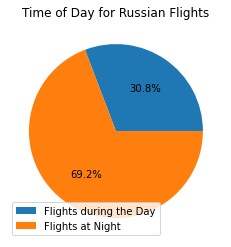

In [6]:
temp_day = df[filter][df['hour_int']>=6]
day = temp_day[df['hour_int']<20]
temp_night = df[filter][df['hour_int']<6]
temp_night2 = df[df['hour_int']>=20]

plt.pie(x=[len(day), len(temp_night) + len(temp_night2)], autopct = '%1.1f%%',)
plt.legend(['Flights during the Day', 'Flights at Night'])
plt.title('Time of Day for Russian Flights')
plt.show()

Because we predict there will be a relationship between the time of the airstrike, we want to use a pie chart to gain an initial impression on what time of day has a higher frequency of airstrikes. In Ukraine now, the sun sets at around 8pm and rises at around 6am, so from 06:00 to 19:59, we will consider day, and 20:00 to 05:59, we consider night. 

Based on this pie chart, we can easily see that there is a higher frequency of Russian flights at night, giving a good indication that there will be a relationship between time of day and frequency of flight through the Ukrainian air space. 


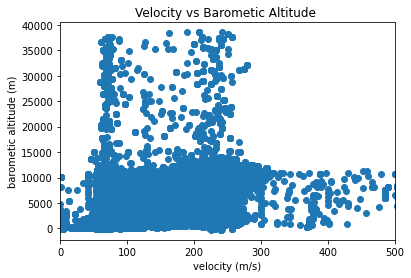

In [7]:
plt.scatter(df[filter]['velocity'],df[filter]['barometic altitude'],) 

plt.title('Velocity vs Barometic Altitude ')
plt.xlabel('velocity (m/s)')
plt.ylabel('barometic altitude (m)')
plt.xlim(0,500)

plt.show()


Based on the average cruising height of an aircraft, at 33 000 ft ~ 10 000 m, we want to consider the barometric altitude when determining if a certain flight can be considered an air strike, so we decided to visualize this data to determine if this is a sufficient factor in the flights that cross Ukrainian airspace. We also found that at lower altitudes, a plane is unable to travel as fast because of all the obstruction lower to the ground, so we want to visualize this relationship with a scatterplot.

We had to limit the x-axis to 500 m/s to get a good view of the more reasonable speeds, excluding the outliers of much higher velocities. By looking at the scatterplot, we can see that the flights under cruising altitude tend to be much slower, between 0 and 300 m/s, showing that they are both within range of the ground and can achieve higher accuracy if they are carrying out airstrikes. 


### __Machine Learning__


In [8]:
section_1_data = df[filter].copy()
section_1_data.head()
df.dropna(inplace=True)

features = df[filter][['hour_int', 'barometic altitude']]
target = df[filter]['hour_int']

#train test split the data with 30% being used for testing
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state=42)
accuracy_list = []

#Create a logistic regression model
logistic = LogisticRegression()

#Fit the model using the train data
logistic.fit(x_train, y_train)

#Store the predictions for the training and test set
pred_train = logistic.predict(x_train)
pred_test = logistic.predict(x_test)

# Print the test and training accuracy
print("Test Accuracy:" , accuracy_score(y_test, pred_test))
print("Training Accuracy: ", accuracy_score(y_train, pred_train))

accuracy_list.append(accuracy_score(y_test, pred_test))


/var/folders/ry/l6smby5j2k72d6m4s9n7bc5w0000gn/T/ipykernel_27750/1623148424.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  features = df[filter][['hour_int', 'barometic altitude']]
/var/folders/ry/l6smby5j2k72d6m4s9n7bc5w0000gn/T/ipykernel_27750/1623148424.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target = df[filter]['hour_int']


Test Accuracy: 0.10609204757055261
Training Accuracy:  0.10437351965244134


/Users/tylerdale/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Analysis 

Based on the output, we choosed to pick the time and altitude of the russian federation plane in the air. First, 
we were going to pick two variables, which was time vs altitude but we needed to filter out other planes from other countries besides Russia. To do this we filtered out other planes. Then the predictor went to 0.106, which is low. Meaning not that accurate. We assume this because our data is huge and scattered which can lead to uncertainities. 

### __Classification Model__


In [9]:
X = df[filter][['barometic altitude', 'velocity']]
Y = df[filter]['time']
X_tr, X_te, Y_tr, Y_te = train_test_split(X,Y,test_size = 0.5, random_state = 42)

/var/folders/ry/l6smby5j2k72d6m4s9n7bc5w0000gn/T/ipykernel_27750/329414426.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = df[filter][['barometic altitude', 'velocity']]
/var/folders/ry/l6smby5j2k72d6m4s9n7bc5w0000gn/T/ipykernel_27750/329414426.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Y = df[filter]['time']


In [10]:
knn = KNeighborsClassifier()
knn.fit(X_tr, Y_tr)
knn_pred_train = knn.predict(X_tr)
knn_pred_test = knn.predict(X_te)

print("Train Accuracy: ", accuracy_score(Y_tr, knn_pred_train))
print("Test Accuracy: ", accuracy_score(Y_te, knn_pred_test))


Train Accuracy:  0.2601799369530369
Test Accuracy:  0.08404727755236656


In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(knn, X_te, Y_te, normalize='true')



### __Conclusion__


Based on our low train accuracy and test accuracy scores for both the logistic and classification models, we can come to the conclusion that we can't predict the time an aircraft flies from the velocity and altitude. This is likely because we tried to assume that the velocity and altitude can be used to predict whether or not the airplane is a fighter plane, even if it is exclusively Russian flights. Then based on this assumption, we attempted to predict the time and this didn't work, even though we could observe some pattern from our data visualizations.

To improve our model, we would have to obtain more information about the flights, maybe the plane type or further information about the flight path. Also because of the size of our dataset, we ran into a lot of issues relating to the capacity of Jupyter Notebook, so with a smaller but equally as accurate, so that we could do more precise models.